## Foundations of Data Science: Inferential Thinking by Resampling

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 10: Confidence Intervals

### Percentiles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 9)


In [2]:
v = np.array([1, 7, 3, 9, 5])

print(np.percentile(v, 25))
print(np.percentile(v, 50))
print(np.percentile(v, 99))
print(np.percentile(v, 99, interpolation='higher'))

3.0
5.0
8.920000000000002
9


In [3]:
v_df = pd.DataFrame({'values':v})

print(v_df.quantile(0.25))
print(v_df.quantile(0.50))
print(v_df.quantile(0.99))
print(v_df.quantile(0.99, interpolation='higher'))

values   3.00
Name: 0.25, dtype: float64
values   5.00
Name: 0.5, dtype: float64
values   8.92
Name: 0.99, dtype: float64
values    9
Name: 0.99, dtype: int64


In [4]:
(v_df
 .sort_values('values')
 .assign(percentile=[i / (len(v_df) - 1) for i in np.arange(len(v_df))])
 #.sort_index()
)

,values,percentile
0,1,0.00
2,3,0.25
4,5,0.50
1,7,0.75
3,9,1.00


### Estimation

Total Compensation   107,219.48
Name: 0.5, dtype: float64

Total Compensation   107,219.48
dtype: float64


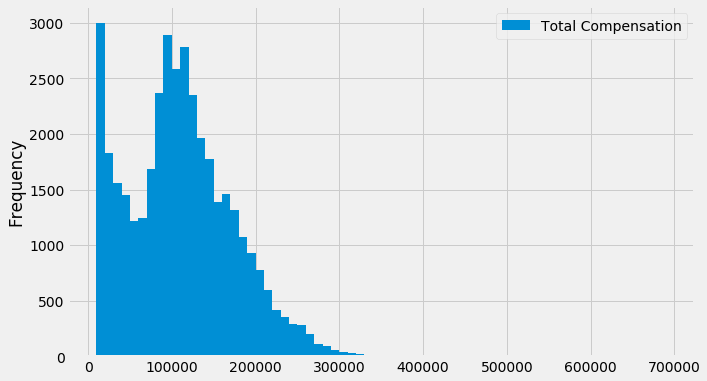

In [5]:
data = pd.read_csv('data/san_francisco_2015.csv',
                   usecols=['Organization Group', 'Job', 'Total Compensation'])

total_comp = (data.loc[data['Total Compensation'] > 10000])

print(total_comp.quantile(0.5))
print()
print(total_comp.median())

total_comp.plot.hist(bins=np.arange(10000, 700000, 10000))
plt.show()

In [6]:
pop_sample = total_comp.sample(200)
print(pop_sample.median())
print()
print(pop_sample.quantile(0.50))

Total Compensation   105,048.14
dtype: float64

Total Compensation   105,048.14
Name: 0.5, dtype: float64


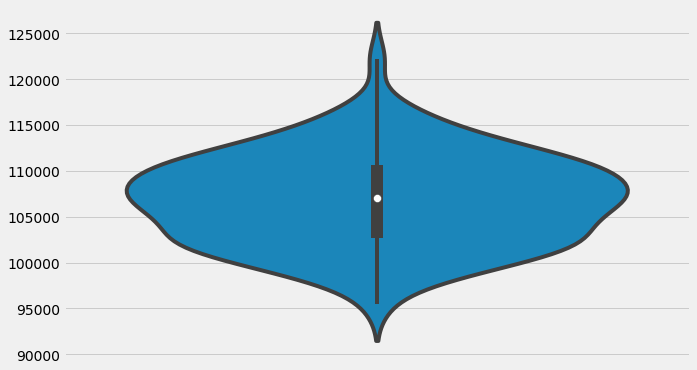

In [7]:
sample_medians = []
for _ in range(100):
    sample_medians.append(total_comp.sample(200).median())
    
sns.violinplot(y=sample_medians)    
plt.show()

### Bootstrap

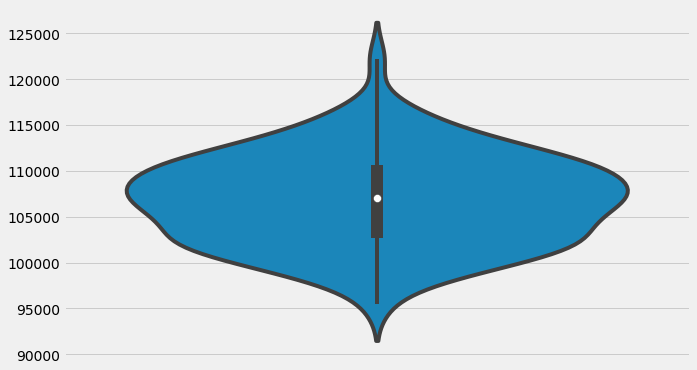

In [39]:
pop_sample = total_comp.sample(200)
bootstrap_medians = [pop_sample.sample(frac=1, replace=True).median()
                     for _ in range(100)]
      
sns.violinplot(y=sample_medians)    
plt.show()

In [26]:
# 95 % confidence interval - from percentiles
print(np.percentile(bootstrap_medians, 2.5))
print(np.percentile(bootstrap_medians, 97.5))

101220.17425000001
120525.5895


In [27]:
# 95 % confidence interval - assuming t-distribution of bootstrapped medians
#  method okay???
cl = 0.95
bootstrap_medians = np.array(bootstrap_medians)
n = len(bootstrap_medians)
x_bar = bootstrap_medians.mean()
s = bootstrap_medians.std(ddof=1)
stats.t.interval(cl, n - 1, x_bar, (s / np.sqrt(n)))

(108901.13452147444, 110908.71777852556)

In [38]:
# 95 % confidence interval - of sample mean (not median)
cl = 0.95
values = pop_sample['Total Compensation'].values
x_bar = np.mean(values)
n = len(values)
s = values.std(ddof=1)
stats.t.interval(cl, n - 1, x_bar, (s / np.sqrt(n)))

(105043.76865446584, 121515.61794553416)